In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import cv2

from matplotlib import pyplot as plt
sns.set_theme(style="dark")

print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", matplotlib.__version__)


# install seaborn csv datasets using:
# cd ~/ && git clone git@github.com:mwaskom/seaborn-data.git
penguins = pd.read_csv("~/seaborn-data/penguins.csv")
print(penguins.head(3))

def show_with_title(title):
    '''Plots title and prompts to close window'''
    fig = plt.figure(1)
    fig.canvas.manager.set_window_title(title)
    plt.show()



pandas version: 1.4.1
numpy version: 1.22.3
seaborn version: 0.11.2
matplotlib version: 3.5.1
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  


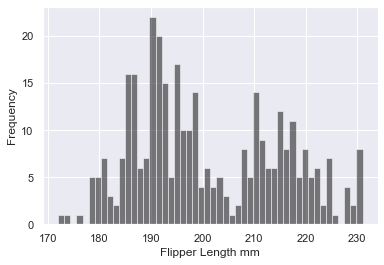

In [5]:
title = "plt DataFrame HIST of univariate"
plt.figure()
df = penguins['flipper_length_mm']
df.hist(
    bins=50, 
    color='black', 
    alpha=0.5)
plt.xlabel("Flipper Length mm")
plt.ylabel("Frequency")
show_with_title(title)

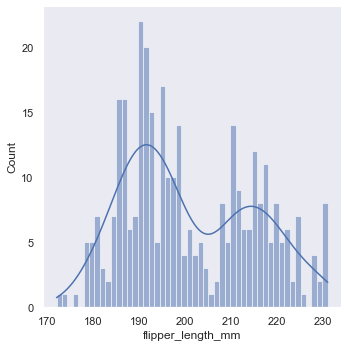

In [6]:
title = "sns DISPLOT of DataFrame univariate with KDE"
sns.displot(
    penguins, 
    bins=50,
    x="flipper_length_mm",
    kde=True)
# smoothed curve only
# sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=1.0)
show_with_title(title)



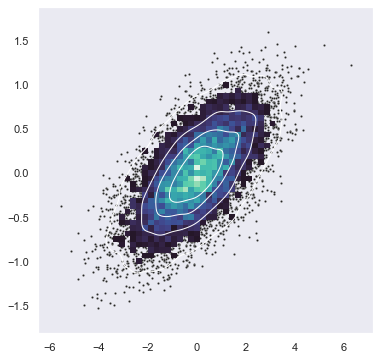

In [7]:
# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

title = "combo sns HISTOGRAM and SCATTERPLOT with DENSITY CONTOURS"
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)
show_with_title(title)


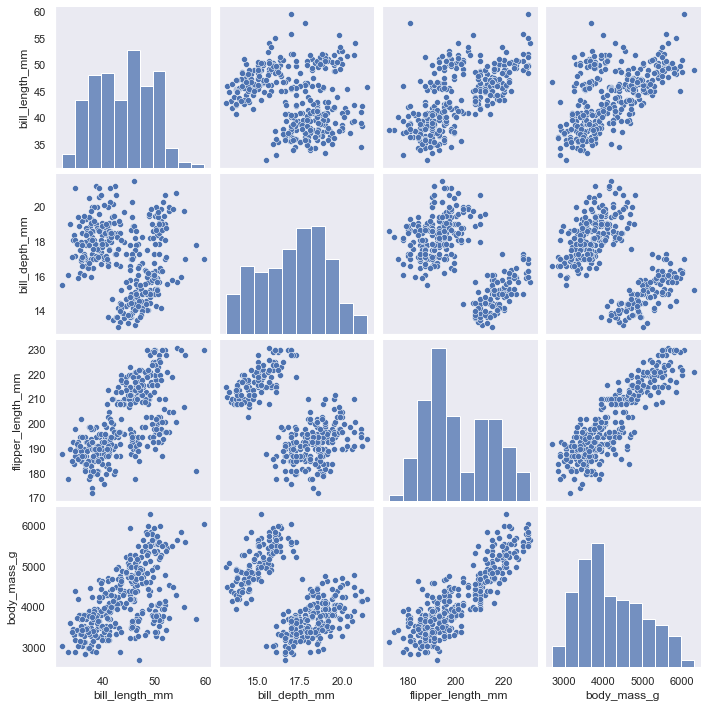

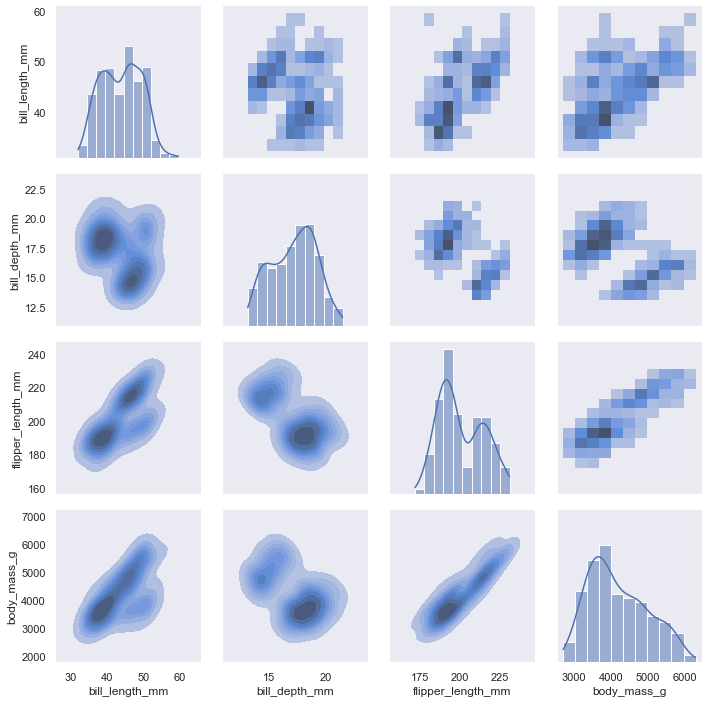

In [8]:
title = "sns PAIR PLOT of 4 attributes"
sns.pairplot(penguins)
show_with_title(title)



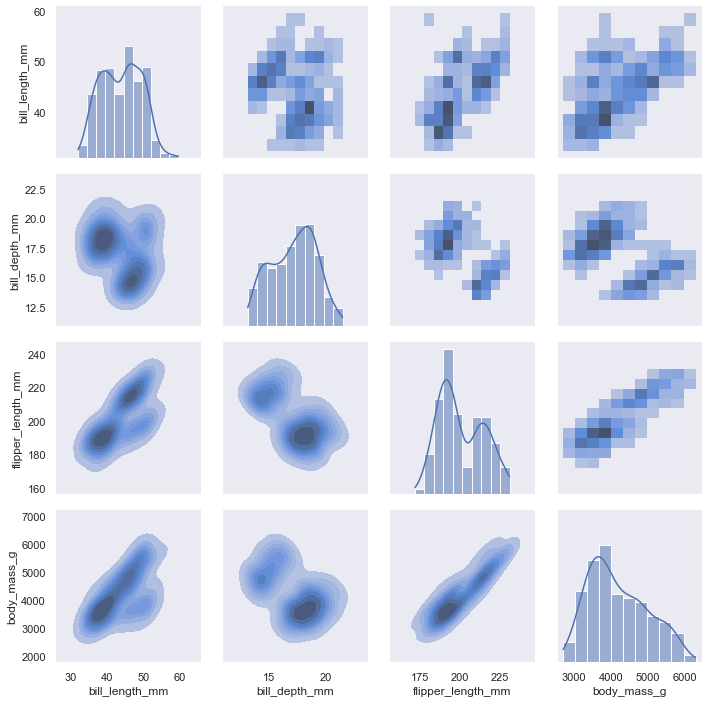

In [10]:
title = "sns PAIR GRID of 4 attributes using HISTPLOT, KDEPLOT, and HISTPLOT+KDE"
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
show_with_title(title)

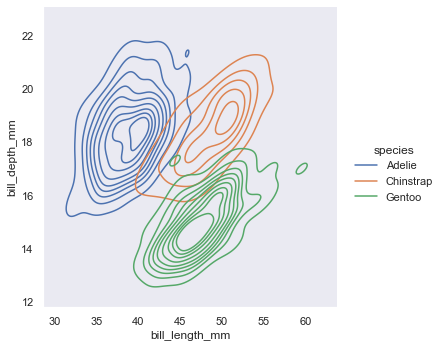

In [11]:
title = "sns DISPLOT of bivariate with KDE"
sns.displot(
    data=penguins, 
    x="bill_length_mm", 
    y="bill_depth_mm", 
    hue="species", 
    kind="kde")
show_with_title(title)



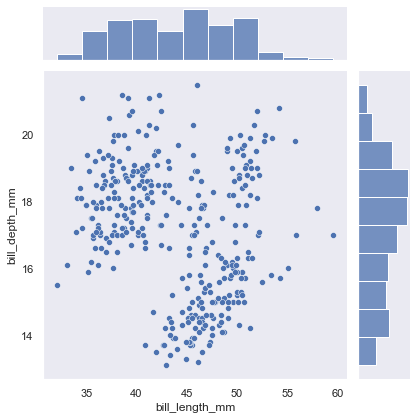

In [12]:
title = "sns JOINTPLOT with MARGINAL DISTRIBUTIONS"
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
show_with_title(title)



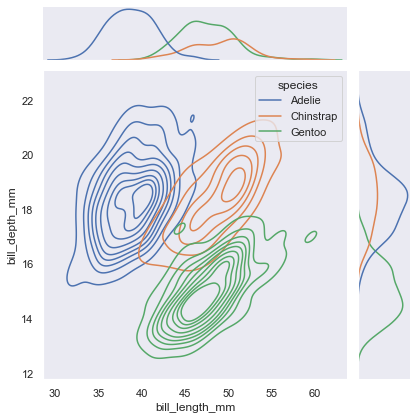

In [14]:
title = "sns JOINTPLOT with MARGINAL KDE DISTRIBUTIONS"
sns.jointplot(
    data=penguins,
    x="bill_length_mm", 
    y="bill_depth_mm", 
    hue="species",
    kind="kde")
show_with_title(title)




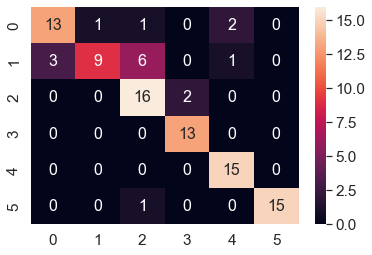

In [15]:
title = "sns HEATMAP from DataFrame"
array = [[13,1,1,0,2,0],
         [3,9,6,0,1,0],
         [0,0,16,2,0,0],
         [0,0,0,13,0,0],
         [0,0,0,0,15,0],
         [0,0,1,0,0,15]]

df_cm = pd.DataFrame(array, range(6), range(6))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
# see https://seaborn.pydata.org/tutorial/color_palettes.html
# sns.color_palette(None) returns current palette
sns.color_palette("flare", as_cmap=True) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
show_with_title(title)




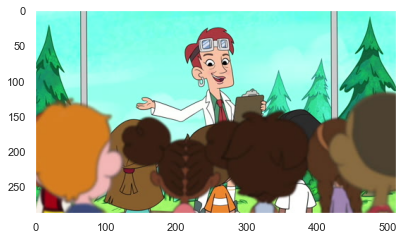

In [29]:
img_file = "../src-images/TT_S01_E02_FRM-00-03-04-10.jpg"
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

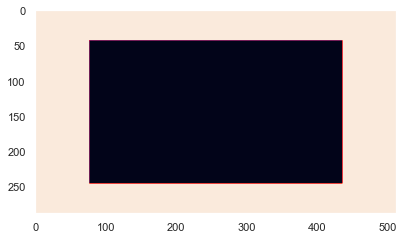

In [38]:
mask = np.full(image.shape[:2], 255, dtype="uint8")
img_h, img_w = image.shape[0], image.shape[1]
ctr_x = round(img_w / 2)
ctr_y = round(img_h / 2)
hlf_wid = round(img_w * 0.7 / 2)
hlf_hgt = round(img_h * 0.7 / 2)
lft_top = (ctr_x-hlf_wid, ctr_y-hlf_hgt)
rgt_bot = (ctr_x+hlf_wid, ctr_y+hlf_hgt)
cv2.rectangle(mask, lft_top, rgt_bot, 0, -1)
plt.imshow(mask)
plt.show()

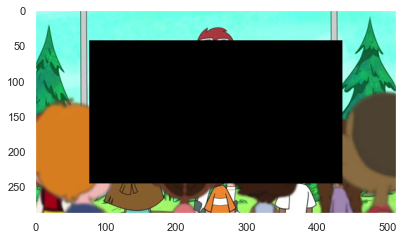

In [39]:
# show masked image
masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked)
plt.show()

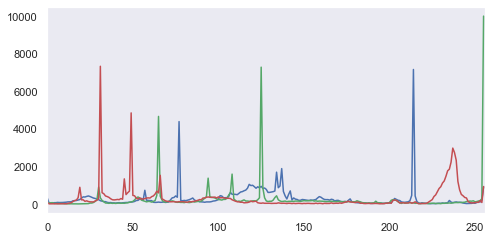

In [40]:
# show histogram of masked image
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], mask, [256], [0, 256])
    hist[hist > 10000] = 10000 # truncate so vertical scale is reasonable
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
plt.show()